In [0]:
import tensorflow as tf
import numpy as np

In [0]:
#importer les données 
raw_data=[]
with open("Rock_Paper_Scissors_Raw.csv", encoding="utf-8") as f:
    print(f.readline()) # header
    i=0
    for line in f:
            raw_data.append([int(c) for c in line.split(",")])

game_id,game_round_id,player_one_throw,player_two_throw



In [0]:
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append(r[2])#ici on prend les données du premier joueur

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)


In [0]:
#ici on refait la meme opération pour prendre  les données du deuxieme joueur
game_data_p2 = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[3] == 0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data_p2.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append(r[3])

seq_game_p2=[]

for seq in game_data_p2:
  if len(seq) > 5:
    seq_game_p2.append(seq)

In [0]:
print(len(seq_game_p2))
print(seq_game_p2[:20])

32903
[[1, 3, 2, 1, 2, 3], [3, 2, 2, 1, 3, 3, 2, 3, 2], [1, 3, 3, 2, 2, 1, 1], [2, 3, 3, 3, 3, 1], [2, 3, 3, 3, 2, 3], [1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3], [2, 3, 1, 2, 2, 2, 3, 2], [3, 3, 1, 1, 1, 3], [1, 3, 1, 1, 1, 1], [1, 1, 1, 3, 2, 1, 3], [3, 3, 1, 1, 1, 2, 1], [3, 1, 2, 2, 1, 2, 3, 2, 2, 2], [3, 3, 2, 1, 3, 3, 1, 2, 1], [3, 3, 1, 3, 2, 3], [2, 1, 1, 1, 3, 2], [2, 1, 3, 2, 1, 2, 3], [1, 1, 1, 2, 1, 3, 3, 1], [2, 1, 1, 3, 2, 3], [1, 1, 3, 3, 1, 1], [2, 1, 3, 1, 2, 1, 1, 1]]


In [0]:
def dataGen(gameData,seq_len=3):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=np.array([0,0,0])
      y[seq[i+seq_len]-1]=1
      yield x,y


In [0]:
#data preprocessing 
X=[]
Y=[]
for x,y in dataGen(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],3,1))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print(X[:10])
print(Y[:10])
print(seq_game[:3])
print(Y.shape)

[[[1.]
  [2.]
  [3.]]

 [[2.]
  [3.]
  [1.]]

 [[3.]
  [1.]
  [1.]]

 [[1.]
  [3.]
  [2.]]

 [[3.]
  [2.]
  [1.]]

 [[2.]
  [1.]
  [3.]]

 [[1.]
  [3.]
  [3.]]

 [[3.]
  [3.]
  [2.]]

 [[3.]
  [2.]
  [3.]]

 [[1.]
  [2.]
  [3.]]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1, 2, 3, 1, 1, 2], [1, 3, 2, 1, 3, 3, 2, 3, 3], [1, 2, 3, 3, 1, 2, 3]]
(146042, 3)


In [0]:
X2=[]
Y2=[]
for x,y in dataGen(seq_game_p2):
  X2.append(x)
  Y2.append(y)
X2=np.array(X2,dtype=np.float32)
X2=X2.reshape((X2.shape[0],3,1))
Y2=np.array(Y2,dtype=np.float32)
Y2=Y2.reshape((Y2.shape[0],3,1))


print(X2[:10])
print(Y2[:10])
print(seq_game_p2[:3])
print(Y2.shape)

In [0]:
#create a model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM 
from tensorflow.keras.layers import GRU, Masking
from tensorflow.keras.layers import Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pandas import DataFrame , concat

In [0]:
#rrn 3 not hot
def myModel(batch_size=5,masking_value=0,lr=0.0001,seq_len=3):
      my_rnn=Sequential()
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,1],return_sequences=False,stateful=True))
      #my_rnn.add(GRU(256,dropout=0.2,return_sequences=True))
      #my_rnn.add(GRU(96,activation='relu',return_sequences=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model1=myModel()
#model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (5, 96)                   28224     
_________________________________________________________________
dense_17 (Dense)             (5, 3)                    291       
Total params: 28,515
Trainable params: 28,515
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.fit(X[:146000],Y[:146000],verbose=1,batch_size=5,validation_split=0.1,epochs=10)

Train on 131400 samples, validate on 14600 samples
Epoch 1/10
131400/131400 [==============================] - 133s 1ms/sample - loss: 1.0964 - acc: 0.3536 - val_loss: 1.0943 - val_acc: 0.3677
Epoch 2/10
131400/131400 [==============================] - 131s 999us/sample - loss: 1.0951 - acc: 0.3605 - val_loss: 1.0935 - val_acc: 0.3747
Epoch 3/10
131400/131400 [==============================] - 133s 1ms/sample - loss: 1.0948 - acc: 0.3616 - val_loss: 1.0934 - val_acc: 0.3688
Epoch 4/10
131400/131400 [==============================] - 137s 1ms/sample - loss: 1.0946 - acc: 0.3632 - val_loss: 1.0930 - val_acc: 0.3691
Epoch 5/10
131400/131400 [==============================] - 138s 1ms/sample - loss: 1.0944 - acc: 0.3656 - val_loss: 1.0935 - val_acc: 0.3675
Epoch 6/10
131400/131400 [==============================] - 133s 1ms/sample - loss: 1.0943 - acc: 0.3665 - val_loss: 1.0929 - val_acc: 0.3708
Epoch 7/10
131400/131400 [==============================] - 130s 992us/sample - loss: 1.0939 - 

In [0]:
#ici on a un tableau des accuracy pour le modele en haut
accuracy_RNN3=[0.3536,0.3605,0.3616,0.3632,0.3656,0.3665,0.3683,0.3699,0.3730,0.3760]

In [0]:
#data preprocessing pour le modele avec one hot encoding
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*3)
    current_game[-1][r[2]-1]=1

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)

In [0]:
def dataGen1(gameData,seq_len=3):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      yield x,y

In [0]:
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],3,3))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 1.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]

 [[0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]
y [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
seq [[[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0]], [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1]]]
(146042, 3)


In [0]:
# rnn 3 with hot 
def myModel2(batch_size=5,masking_value=0,lr=0.0001,seq_len=3):
      my_rnn=Sequential()
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,3],return_sequences=False,stateful=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model2=myModel2()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (5, 96)                   28800     
_________________________________________________________________
dense_18 (Dense)             (5, 3)                    291       
Total params: 29,091
Trainable params: 29,091
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model2.fit(X[:146000],Y[:146000],verbose=1,batch_size=5,validation_split=0.1,epochs=5)

Train on 131400 samples, validate on 14600 samples
Epoch 1/5
131400/131400 [==============================] - 138s 1ms/sample - loss: 1.0953 - acc: 0.3607 - val_loss: 1.0927 - val_acc: 0.3797
Epoch 2/5
131400/131400 [==============================] - 135s 1ms/sample - loss: 1.0910 - acc: 0.3847 - val_loss: 1.0894 - val_acc: 0.3956
Epoch 3/5
131400/131400 [==============================] - 138s 1ms/sample - loss: 1.0892 - acc: 0.3944 - val_loss: 1.0898 - val_acc: 0.3984
Epoch 4/5
131400/131400 [==============================] - 134s 1ms/sample - loss: 1.0890 - acc: 0.3947 - val_loss: 1.0876 - val_acc: 0.3973
Epoch 5/5
131400/131400 [==============================] - 132s 1ms/sample - loss: 1.0886 - acc: 0.3963 - val_loss: 1.0885 - val_acc: 0.4012


In [0]:
model2.fit(X[:146000],Y[:146000],verbose=1,batch_size=5,validation_split=0.1,epochs=5)

Train on 131400 samples, validate on 14600 samples
Epoch 1/5
131400/131400 [==============================] - 134s 1ms/sample - loss: 1.0880 - acc: 0.3962 - val_loss: 1.0874 - val_acc: 0.3980
Epoch 2/5
131400/131400 [==============================] - 133s 1ms/sample - loss: 1.0879 - acc: 0.3966 - val_loss: 1.0873 - val_acc: 0.3996
Epoch 3/5
131400/131400 [==============================] - 132s 1ms/sample - loss: 1.0879 - acc: 0.3961 - val_loss: 1.0874 - val_acc: 0.3972
Epoch 4/5
131400/131400 [==============================] - 132s 1ms/sample - loss: 1.0878 - acc: 0.3967 - val_loss: 1.0869 - val_acc: 0.3999
Epoch 5/5
131400/131400 [==============================] - 133s 1ms/sample - loss: 1.0878 - acc: 0.3964 - val_loss: 1.0870 - val_acc: 0.3986


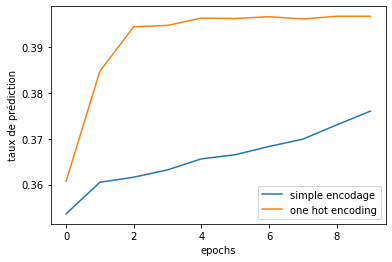

In [0]:
accuracy_RNN3=[0.3536,0.3605,0.3616,0.3632,0.3656,0.3665,0.3683,0.3699,0.3730,0.3760]
RNN3_hot_encod=[0.3607,0.3847,0.3944,0.3947,0.3963,0.3962,0.3966,0.3961,0.3967,0.3967]

import matplotlib.pyplot as plt
plt.plot(accuracy_RNN3, label="simple encodage")
plt.plot(RNN3_hot_encod, label="one hot encoding")
plt.ylabel('taux de prédiction')
plt.xlabel('epochs')
plt.legend()

plt.savefig('foo.png', bbox_inches='tight')
plt.show()

In [0]:
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0 or r[3]==0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*6)# ici on prend les données des deux joueurs au meme temps  
    current_game[-1][r[2]-1]=1
    current_game[-1][r[3]-1+3]=1

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)

def dataGen1(gameData,seq_len=3):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      y=y[3:]
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],3,6))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[1. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]]

 [[0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 1. 0.]]

 [[1. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [0. 1. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 1. 0.]
  [0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]]

 [[0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]]

 [[1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]]

 [[0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 1. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 1.]
  [0. 1. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 1.]]

 [[1. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]]]
y [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
seq [[[1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1]], [[1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0], [1, 0, 

In [0]:
def myModel3(batch_size=1,masking_value=0,lr=0.0001,seq_len=3):
      my_rnn=Sequential()
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,6],return_sequences=False,stateful=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model3=myModel3()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (1, 96)                   29952     
_________________________________________________________________
dense_1 (Dense)              (1, 3)                    291       
Total params: 30,243
Trainable params: 30,243
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_RNN3_2players=model3.fit(X[:10000],Y[:10000],verbose=1,batch_size=1,validation_split=0.1,epochs=30)

Epoch 1/30
9000/9000 [==============================] - 34s 4ms/step - loss: 1.0934 - accuracy: 0.3668 - val_loss: 1.0860 - val_accuracy: 0.3580
Epoch 2/30
9000/9000 [==============================] - 34s 4ms/step - loss: 1.0918 - accuracy: 0.3769 - val_loss: 1.0900 - val_accuracy: 0.3700
Epoch 3/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0909 - accuracy: 0.3813 - val_loss: 1.0846 - val_accuracy: 0.3700
Epoch 4/30
9000/9000 [==============================] - 35s 4ms/step - loss: 1.0903 - accuracy: 0.3817 - val_loss: 1.0890 - val_accuracy: 0.3660
Epoch 5/30
9000/9000 [==============================] - 35s 4ms/step - loss: 1.0900 - accuracy: 0.3782 - val_loss: 1.0902 - val_accuracy: 0.3600
Epoch 6/30
9000/9000 [==============================] - 34s 4ms/step - loss: 1.0890 - accuracy: 0.3840 - val_loss: 1.0843 - val_accuracy: 0.3730
Epoch 7/30
9000/9000 [==============================] - 35s 4ms/step - loss: 1.0882 - accuracy: 0.3891 - val_loss: 1.0891 - val_ac

In [0]:
def calculate_winner(x,y):
    result = x-y
    if result == 0: return 0 #tie
    if result in (1,-2): return 1 #win
    return -1 #lose
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0 or r[3]==0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*7) # ici les données des deux joueurs avec le score 
    current_game[-1][r[2]-1]=1
    current_game[-1][r[3]-1+3]=1
    current_game[-1][6]=calculate_winner(r[2],r[3])

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)

def dataGen1(gameData,seq_len=3):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      y=y[3:6]
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],3,7))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  1.  0.  1.]]

 [[ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 1.  0.  0.  1.  0.  0.  0.]]

 [[ 0.  0.  1.  0.  1.  0.  1.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]]

 [[ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]]

 [[ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]]

 [[ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  0.  1.  0.]]]
y [[1. 0. 0.]
 [0.

In [0]:
def myModel3(batch_size=1,masking_value=0,lr=0.0001,seq_len=3):
      my_rnn=Sequential()
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,7],return_sequences=False,stateful=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model3_score=myModel3()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (1, 96)                   30240     
_________________________________________________________________
dense_2 (Dense)              (1, 3)                    291       
Total params: 30,531
Trainable params: 30,531
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history_RNN3_2players_score=model3_score.fit(X[:10000],Y[:10000],verbose=1,batch_size=1,validation_split=0.1,epochs=30)

Epoch 1/30
9000/9000 [==============================] - 37s 4ms/step - loss: 1.0955 - accuracy: 0.3653 - val_loss: 1.0848 - val_accuracy: 0.3620
Epoch 2/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0927 - accuracy: 0.3740 - val_loss: 1.0792 - val_accuracy: 0.4060
Epoch 3/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0919 - accuracy: 0.3739 - val_loss: 1.0828 - val_accuracy: 0.4100
Epoch 4/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0907 - accuracy: 0.3761 - val_loss: 1.0830 - val_accuracy: 0.4190
Epoch 5/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0896 - accuracy: 0.3798 - val_loss: 1.0833 - val_accuracy: 0.4250
Epoch 6/30
9000/9000 [==============================] - 37s 4ms/step - loss: 1.0883 - accuracy: 0.3842 - val_loss: 1.0871 - val_accuracy: 0.3590
Epoch 7/30
9000/9000 [==============================] - 37s 4ms/step - loss: 1.0874 - accuracy: 0.3879 - val_loss: 1.0818 - val_ac

In [0]:
#ici on refait une expériance sur les rnn avec 3 coup à prendre en considération chaque coup codé en one hot encoding
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*3)
    current_game[-1][r[2]-1]=1

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)



def dataGen1(gameData,seq_len=3):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],3,3))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 1.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]

 [[0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]
y [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
seq [[[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0]], [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1]]]
(146042, 3)


In [0]:
#ici on refait une expériance déja faite mais sur 30 épochs 
def myModel3(batch_size=1,masking_value=0,lr=0.0001,seq_len=3):
      my_rnn=Sequential()
  
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,3],return_sequences=False,stateful=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model_3_1player=myModel3()
history_RNN3_1player=model_3_1player.fit(X[:10000],Y[:10000],verbose=1,batch_size=1,validation_split=0.1,epochs=30)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (1, 96)                   29088     
_________________________________________________________________
dense_3 (Dense)              (1, 3)                    291       
Total params: 29,379
Trainable params: 29,379
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
9000/9000 [==============================] - 37s 4ms/step - loss: 1.0977 - accuracy: 0.3620 - val_loss: 1.1035 - val_accuracy: 0.3390
Epoch 2/30
9000/9000 [==============================] - 36s 4ms/step - loss: 1.0957 - accuracy: 0.3738 - val_loss: 1.0969 - val_accuracy: 0.3420
Epoch 3/30
9000/9000 [==============================] - 37s 4ms/step - loss: 1.0949 - accuracy: 0.3751 - val_loss: 1.0959 - val_accuracy: 0.4000
Epoch 4/30
9000/9000 [==============================] - 37s 4ms/step - l

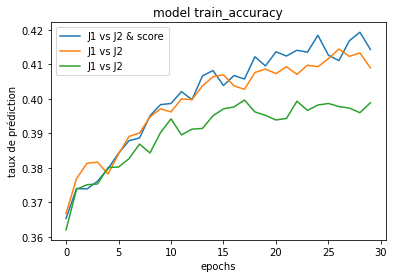

In [0]:
import matplotlib.pyplot as plt
plt.plot(history_RNN3_2players_score.history["accuracy"], label="J1 vs J2 & score")
plt.plot(history_RNN3_2players.history["accuracy"], label="J1 vs J2")
plt.plot(history_RNN3_1player.history["accuracy"], label="J1 vs J2")
plt.ylabel('taux de prédiction')

plt.xlabel('epochs')
plt.title('model train_accuracy')
plt.legend()

plt.savefig('foo.png', bbox_inches='tight')
plt.show()

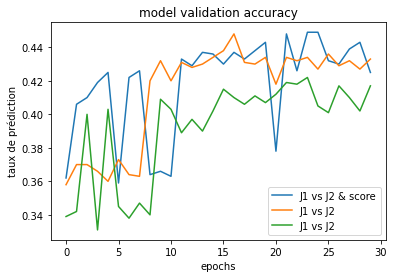

In [0]:
plt.plot(history_RNN3_2players_score.history["val_accuracy"], label="J1 vs J2 & score")
plt.plot(history_RNN3_2players.history["val_accuracy"], label="J1 vs J2")
plt.plot(history_RNN3_1player.history["val_accuracy"], label="J1 vs J2")
plt.ylabel('taux de prédiction')
plt.xlabel('epochs')
plt.title('model validation accuracy')
plt.legend()

plt.savefig('foo1.png', bbox_inches='tight')
plt.show()

In [0]:
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0 or r[3]==0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*6)
    current_game[-1][r[2]-1]=1
    current_game[-1][r[3]-1+3]=1

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)

def dataGen1(gameData,seq_len=5):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      y=y[3:]
     # y=tf.constant(y)
      #y=tf.reshape(y,[1,3])
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],5,6))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[1. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 1. 0.]]

 [[1. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]]

 [[0. 0. 1. 0. 1. 0.]
  [0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]]

 [[0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 1. 0. 0. 1. 0.]]

 [[1. 0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 1. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 1.]]

 [[1. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [1. 0. 0. 0. 1. 0.]]

 [[0. 1. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 0. 1. 0. 1. 0.]
  [1. 0. 0. 0. 1. 0.]
  [0. 1. 0. 1. 0. 0.]]

 [[0. 0. 1. 0. 1. 0.]
  [0. 0. 1. 0. 0. 1.]
  [1. 0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0. 1.]
  [0. 1. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0. 1.]
  [0. 1. 0. 0. 0. 1.]
  [1. 0. 0. 0.

In [0]:
#RNN 5 2 player with hot
def myModel4(batch_size=5,masking_value=0,lr=0.0001,seq_len=5):
      my_rnn=Sequential()
      #my_rnn.add(Masking(mask_value=masking_value,input_shape=(20, 6)))
      my_rnn.add(GRU(96,batch_input_shape=[batch_size,seq_len,6],return_sequences=False,stateful=True))
      #my_rnn.add(GRU(256,dropout=0.2,return_sequences=True))
      #my_rnn.add(GRU(96,activation='relu',return_sequences=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model4=myModel4()
model4.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=5,shuffle=True)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_23 (GRU)                 (5, 96)                   29664     
_________________________________________________________________
dense_22 (Dense)             (5, 3)                    291       
Total params: 29,955
Trainable params: 29,955
Non-trainable params: 0
_________________________________________________________________
None
Train on 75060 samples, validate on 8340 samples
Epoch 1/5
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0921 - acc: 0.3735 - val_loss: 1.0914 - val_acc: 0.3715
Epoch 2/5
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0892 - acc: 0.3791 - val_loss: 1.0886 - val_acc: 0.3807
Epoch 3/5
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0860 - acc: 0.3901 - val_loss: 1.0834 - val_acc: 0.3939
Epoch 4/5
75060/75060 [=================

In [0]:
model4.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=10)

Train on 75060 samples, validate on 8340 samples
Epoch 1/10
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0807 - acc: 0.4042 - val_loss: 1.0803 - val_acc: 0.3940
Epoch 2/10
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0800 - acc: 0.4040 - val_loss: 1.0791 - val_acc: 0.4010
Epoch 3/10
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0795 - acc: 0.4043 - val_loss: 1.0791 - val_acc: 0.4010
Epoch 4/10
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0790 - acc: 0.4054 - val_loss: 1.0778 - val_acc: 0.4036
Epoch 5/10
75060/75060 [==============================] - 101s 1ms/sample - loss: 1.0786 - acc: 0.4082 - val_loss: 1.0784 - val_acc: 0.4019
Epoch 6/10
75060/75060 [==============================] - 104s 1ms/sample - loss: 1.0783 - acc: 0.4056 - val_loss: 1.0784 - val_acc: 0.4066
Epoch 7/10
75060/75060 [==============================] - 105s 1ms/sample - loss: 1.0780 - acc: 0.4081 - val_lo

In [0]:
tf.keras.backend.set_value(model2.optimizer.lr, 0.000001)
model4.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=5)

Train on 75060 samples, validate on 8340 samples
Epoch 1/5
75060/75060 [==============================] - 105s 1ms/sample - loss: 1.0764 - acc: 0.4083 - val_loss: 1.0779 - val_acc: 0.4036
Epoch 2/5
75060/75060 [==============================] - 104s 1ms/sample - loss: 1.0758 - acc: 0.4100 - val_loss: 1.0784 - val_acc: 0.4044
Epoch 3/5
75060/75060 [==============================] - 104s 1ms/sample - loss: 1.0755 - acc: 0.4113 - val_loss: 1.0788 - val_acc: 0.3998
Epoch 4/5
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0752 - acc: 0.4108 - val_loss: 1.0783 - val_acc: 0.4012
Epoch 5/5
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0748 - acc: 0.4119 - val_loss: 1.0774 - val_acc: 0.4050


In [0]:
def myModel5(batch_size=5,masking_value=0,lr=0.0001,seq_len=5):
      my_rnn=Sequential()
      #my_rnn.add(Masking(mask_value=masking_value,input_shape=(20, 6)))
      my_rnn.add(GRU(256,batch_input_shape=[batch_size,seq_len,6],return_sequences=False,stateful=True))
      #my_rnn.add(GRU(256,dropout=0.2,return_sequences=True))
      #my_rnn.add(GRU(96,activation='relu',return_sequences=True))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      print(my_rnn.summary())
      return my_rnn 

In [0]:
model5=myModel5()


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (5, 256)                  201984    
_________________________________________________________________
dense_23 (Dense)             (5, 3)                    771       
Total params: 202,755
Trainable params: 202,755
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model5.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=20)

Train on 75060 samples, validate on 8340 samples
Epoch 1/20
75060/75060 [==============================] - 105s 1ms/sample - loss: 1.0917 - acc: 0.3765 - val_loss: 1.0914 - val_acc: 0.3723
Epoch 2/20
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0872 - acc: 0.3866 - val_loss: 1.0847 - val_acc: 0.3946
Epoch 3/20
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0833 - acc: 0.3981 - val_loss: 1.0813 - val_acc: 0.4020
Epoch 4/20
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0814 - acc: 0.4004 - val_loss: 1.0824 - val_acc: 0.3995
Epoch 5/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0805 - acc: 0.4043 - val_loss: 1.0803 - val_acc: 0.3978
Epoch 6/20
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0798 - acc: 0.4050 - val_loss: 1.0803 - val_acc: 0.3983
Epoch 7/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0790 - acc: 0.4055 - val_lo

In [0]:
model5.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=20)

Train on 75060 samples, validate on 8340 samples
Epoch 1/20
75060/75060 [==============================] - 104s 1ms/sample - loss: 1.0718 - acc: 0.4169 - val_loss: 1.0786 - val_acc: 0.4085
Epoch 2/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0711 - acc: 0.4187 - val_loss: 1.0781 - val_acc: 0.4109
Epoch 3/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0709 - acc: 0.4185 - val_loss: 1.0790 - val_acc: 0.4122
Epoch 4/20
75060/75060 [==============================] - 103s 1ms/sample - loss: 1.0703 - acc: 0.4191 - val_loss: 1.0807 - val_acc: 0.3992
Epoch 5/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0697 - acc: 0.4198 - val_loss: 1.0784 - val_acc: 0.4066
Epoch 6/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0693 - acc: 0.4195 - val_loss: 1.0823 - val_acc: 0.4020
Epoch 7/20
75060/75060 [==============================] - 102s 1ms/sample - loss: 1.0685 - acc: 0.4228 - val_lo

In [0]:
def calculate_winner(x,y):
    result = x-y
    if result == 0: return 0 #tie
    if result in (1,-2): return 1 #win
    return -1 #lose

In [0]:
game_data = []
current_game_id = None
current_game = []
for r in raw_data:
    if r[2] == 0 or r[3]==0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*7)
    current_game[-1][r[2]-1]=1
    current_game[-1][r[3]-1+3]=1
    current_game[-1][6]=calculate_winner(r[2],r[3])
for r in raw_data:
    if r[2] == 0 or r[3]==0:
        continue  #on élimine les zeros ou les joueurs n'ont pas jouer
    if current_game_id != r[0]:
        game_data.append(current_game) #on va creer un tableau de tableaux ou chaque tableau représente une partie
        current_game_id = r[0]
        current_game = []
    current_game.append([0]*7)
    current_game[-1][r[3]-1]=1
    current_game[-1][r[2]-1+3]=1
    current_game[-1][6]=calculate_winner(r[3],r[2])

seq_game=[]

for seq in game_data:
  if len(seq) > 5:
    seq_game.append(seq)

def dataGen1(gameData,seq_len=5):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      y=y[3:6]
     # y=tf.constant(y)
      #y=tf.reshape(y,[1,3])
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(seq_game):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],5,7))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)

x [[[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 0.  1.  0.  0.  0.  1.

In [0]:
#satatful = False and score
import matplotlib.pyplot as plt
def myModel6(batch_size=5,masking_value=0,lr=0.001,seq_len=5):
      my_rnn=Sequential()
      my_rnn.add(GRU(96,input_shape=[None,7],return_sequences=False,stateful=False))
      my_rnn.add(Dense(3,activation="softmax"))
      adam=Adam(lr=lr)
      
      my_rnn.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
      #
      return my_rnn 

model6=myModel6()

In [0]:
history=model6.fit(X,Y,verbose=1,batch_size=5,epochs=3,validation_split=0.01)



Train on 165155 samples, validate on 1669 samples
Epoch 1/3
165155/165155 [==============================] - 271s 2ms/sample - loss: 1.0846 - acc: 0.3919 - val_loss: 1.0838 - val_acc: 0.4014
Epoch 2/3
165155/165155 [==============================] - 270s 2ms/sample - loss: 1.0782 - acc: 0.4048 - val_loss: 1.0801 - val_acc: 0.4092
Epoch 3/3
165155/165155 [==============================] - 270s 2ms/sample - loss: 1.0762 - acc: 0.4090 - val_loss: 1.0776 - val_acc: 0.4194


In [0]:
tf.keras.backend.set_value(model6.optimizer.lr, 0.0005)
history=model6.fit(X,Y,verbose=1,batch_size=5,epochs=3,validation_split=0.01)

Train on 165155 samples, validate on 1669 samples
Epoch 1/3
165155/165155 [==============================] - 282s 2ms/sample - loss: 1.0724 - acc: 0.4147 - val_loss: 1.0750 - val_acc: 0.4224
Epoch 2/3
165155/165155 [==============================] - 270s 2ms/sample - loss: 1.0709 - acc: 0.4173 - val_loss: 1.0750 - val_acc: 0.4200
Epoch 3/3
165155/165155 [==============================] - 273s 2ms/sample - loss: 1.0696 - acc: 0.4184 - val_loss: 1.0724 - val_acc: 0.4182


In [0]:
RNN_hot_score=[0.3919,0.4048,0.4090,0.4147,0.4173,0.4184,0.4219,0.4235,0.4255,0.4271]
tf.keras.backend.set_value(model6.optimizer.lr, 0.0003)
history=model6.fit(X,Y,verbose=1,batch_size=5,epochs=5,validation_split=0.01)

Train on 165155 samples, validate on 1669 samples
Epoch 1/5
165155/165155 [==============================] - 270s 2ms/sample - loss: 1.0669 - acc: 0.4219 - val_loss: 1.0734 - val_acc: 0.4194
Epoch 2/5
165155/165155 [==============================] - 268s 2ms/sample - loss: 1.0655 - acc: 0.4235 - val_loss: 1.0750 - val_acc: 0.4218
Epoch 3/5
165155/165155 [==============================] - 267s 2ms/sample - loss: 1.0643 - acc: 0.4255 - val_loss: 1.0774 - val_acc: 0.4116
Epoch 4/5
165155/165155 [==============================] - 277s 2ms/sample - loss: 1.0632 - acc: 0.4271 - val_loss: 1.0781 - val_acc: 0.4158
Epoch 5/5
165155/165155 [==============================] - 281s 2ms/sample - loss: 1.0621 - acc: 0.4289 - val_loss: 1.0786 - val_acc: 0.4086


In [0]:
RNN3_2_player_hot=[0.3784,0.3913,0.3980,0.4003,0.3994,0.3995,0.4020,0.4011,0.4011,0.4013]
RNN_hot_2player_score=[0.3919,0.4048,0.4090,0.4147,0.4173,0.4184,0.4219,0.4235,0.4255,0.4271]
RNN3_hot_encod=[0.3607,0.3847,0.3944,0.3947,0.3963,0.3962,0.3966,0.3961,0.3967,0.3967]
accuracy_DNN=[0.3521,0.3615,0.3690,0.3736,0.3776,0.3804,0.3824,0.3825,0.3832,0.3831]
#accuracy_RNN3=[0.3536,0.3605,0.3616,0.3632,0.3656,0.3665,0.3683,0.3699,0.3730,0.3760]
accuracy_RNN3_val=[0.3677,0.3747,0.3688,0.3691,0.3675,0.3708,0.3789,0.3815,0.3823,0.3873]

In [0]:
model6.save("rps.h5")

In [0]:
model6.fit(X[:83400],Y[:83400],verbose=1,batch_size=5,validation_split=0.1,epochs=20)

Train on 75060 samples, validate on 8340 samples
Epoch 1/20
75060/75060 [==============================] - 120s 2ms/sample - loss: 1.0913 - acc: 0.3759 - val_loss: 1.0893 - val_acc: 0.3748
Epoch 2/20
75060/75060 [==============================] - 118s 2ms/sample - loss: 1.0861 - acc: 0.3891 - val_loss: 1.0863 - val_acc: 0.3830
Epoch 3/20
75060/75060 [==============================] - 115s 2ms/sample - loss: 1.0823 - acc: 0.3976 - val_loss: 1.0826 - val_acc: 0.3959
Epoch 4/20
75060/75060 [==============================] - 115s 2ms/sample - loss: 1.0806 - acc: 0.4036 - val_loss: 1.0796 - val_acc: 0.3976
Epoch 5/20
75060/75060 [==============================] - 114s 2ms/sample - loss: 1.0795 - acc: 0.4044 - val_loss: 1.0795 - val_acc: 0.4024
Epoch 6/20
75060/75060 [==============================] - 114s 2ms/sample - loss: 1.0786 - acc: 0.4070 - val_loss: 1.0785 - val_acc: 0.4012
Epoch 7/20
75060/75060 [==============================] - 114s 2ms/sample - loss: 1.0779 - acc: 0.4069 - val_lo

In [0]:
print(X[1:6])
model6.predict(X[1:6].reshape(5,5,7))

[[[ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 0.  0.  1.  0.  0.  1.  0.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  1. -1.]
  [ 0.  0.  1.  0.  0.  1.  0.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 1.  0.  0.  0.  1.  0. -1.]]]


array([[0.2940119 , 0.35000095, 0.3559872 ],
       [0.34922677, 0.39667127, 0.25410196],
       [0.4433227 , 0.28591844, 0.27075887],
       [0.42750686, 0.2949187 , 0.27757448],
       [0.38520244, 0.327477  , 0.28732055]], dtype=float32)

In [0]:
import pickle
#dans cette partie on récupere des coup jouées par un camarade en tous 33 partie pour voir l'evolution du taux de prédiction durant ces parties
with open("dataBadr.txt", "rb") as fp:   # Unpickling
                dataG= pickle.load(fp)



for seq in dataG:
    print(seq)

[[0, '1', '1'], [0, '2', '0'], [0, '1', '0'], [0, '0', '0'], [0, '1', '0'], [0, '1', '0'], [0, '2', '0'], [0, '1', '2'], [0, '1', '1'], [0, '1', '0'], [0, '0', '2'], [0, '1', '2'], [0, '2', '2'], [0, '0', '2'], [0, '1', '0'], [0, '1', '2'], [0, '2', '0'], [0, '0', '2'], [0, '1', '2'], [0, '1', '2'], [0, '0', '0'], [0, '1', '2'], [0, '1', '2'], [0, '2', '0'], [0, '1', '1'], [0, '1', '1'], [0, '2', '0'], [0, '2', '1'], [0, '1', '0'], [0, '0', '1'], [0, '1', '2'], [0, '0', '2'], [0, '1', '2'], [0, '1', '2'], [0, '2', '0'], [0, '1', '2'], [0, '2', '1'], [0, '0', '1'], [0, '0', '2'], [0, '1', '0'], [0, '2', '2'], [0, '1', '1'], [0, '1', '1'], [0, '1', '0'], [0, '1', '0'], [0, '0', '2'], [0, '2', '2'], [0, '2', '0'], [0, '0', '2'], [0, '2', '1'], [0, '1', '0'], [0, '1', '1'], [0, '2', '0'], [0, '1', '2'], [0, '1', '2'], [0, '0', '0'], [0, '0', '2'], [0, '1', '2'], [0, '0', '2'], [0, '1', '2'], [0, '1', '2'], [0, '0', '0'], [0, '0', '2'], [0, '1', '2'], [0, '2', '2'], [0, '2', '2'], [0, '1', 

In [0]:
#on met les données sous le format d'entré des réseaux de neurones 
data=[]
trad={'0':0,'1':1,'2':2}
for game in dataG:
  gam=[]
  for move in game :
    mov=7*[0]
    pmove=trad[move[1]]
    mmove=trad[move[2]]
    mov[mmove]=1
    mov[pmove+3]=1
    mov[6]=calculate_winner(mmove,pmove)
    gam.append(mov)
  data.append(gam)

print(data[0])


[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 

In [0]:
import numpy as np

def dataGen1(gameData,seq_len=5):
  for seq in gameData:
    for i in range(len(seq)-seq_len):
      x=seq[i:i+seq_len]
      y=seq[i+seq_len]
      y=y[3:6]
      yield x,y
X=[]
Y=[]
for x,y in dataGen1(data):
  X.append(x)
  Y.append(y)
X=np.array(X,dtype=np.float32)
X=X.reshape((X.shape[0],5,7))
Y=np.array(Y,dtype=np.float32)
Y=Y.reshape((Y.shape[0],3))


print("x",X[:10])
print("y",Y[:10])
print("seq",seq_game[:3])
print(Y.shape)


x [[[ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  0.  0.  1.  1.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 1.  0.  0.  0.  0.  1.  1.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  0.  1.  1.]]

 [[ 1.  0.  0.  1.  0.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]]

 [[ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]]

 [[ 1.  0.  0.  0.  1.  0. -1.]
  [ 1.  0.  0.  0.  0.  1.  1.]
  [ 0.  0.  1.  0.  1.  0.  1.]
  [ 0.  1.  0.  0.  1.  0.  0.]
  [ 1.  0.  0.  0.  1.  0. -1.]]

 [[ 1.  0.  0.  0.  0.  1.

[[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0,

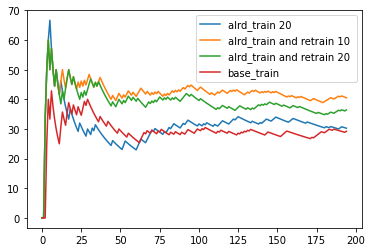

base_train accuracy  29.23076933076923
alrd_train accuracy  30.256410356410257
alrd_train and retrain accuracy 10  40.51282061282051
alrd_train and retrain accuracy 20 36.41025651025641
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 

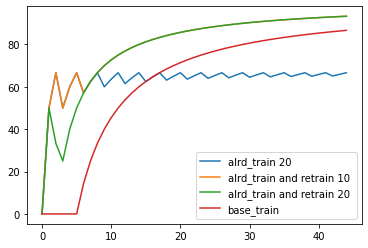

base_train accuracy  86.66666676666667
alrd_train accuracy  66.66666676666667
alrd_train and retrain accuracy 10  93.33333343333332
alrd_train and retrain accuracy 20 93.33333343333332
[[[0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 

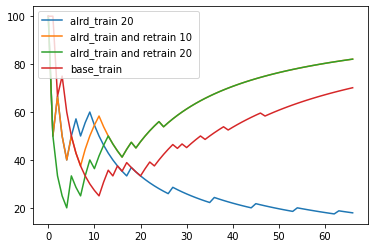

base_train accuracy  70.14925383134327
alrd_train accuracy  17.91044786119403
alrd_train and retrain accuracy 10  82.08955233880596
alrd_train and retrain accuracy 20 82.08955233880596
[[[0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 

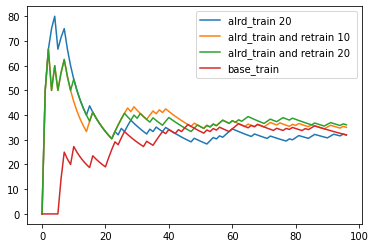

base_train accuracy  31.95876298659794
alrd_train accuracy  31.95876298659794
alrd_train and retrain accuracy 10  35.05154649175258
alrd_train and retrain accuracy 20 36.082474326804125
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1]]]
aa
(1, 5, 7)


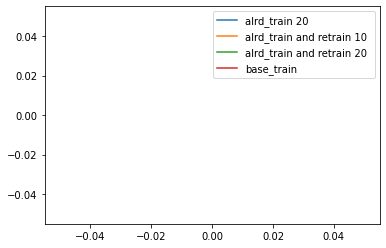

base_train accuracy  1e-07
alrd_train accuracy  1e-07
alrd_train and retrain accuracy 10  1e-07
alrd_train and retrain accuracy 20 1e-07
[[[0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1,

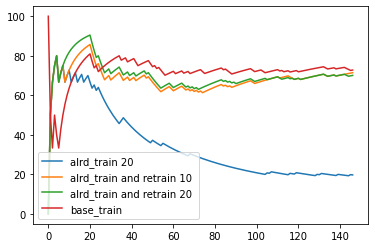

base_train accuracy  72.7891157462585
alrd_train accuracy  19.727891256462588
alrd_train and retrain accuracy 10  71.42857152857142
alrd_train and retrain accuracy 20 70.06802731088435
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1]]]
aa
(0, 5, 7)


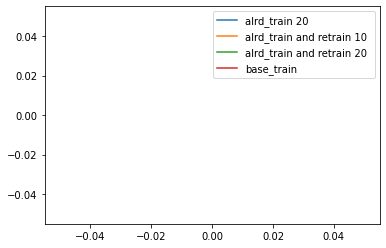

[[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [

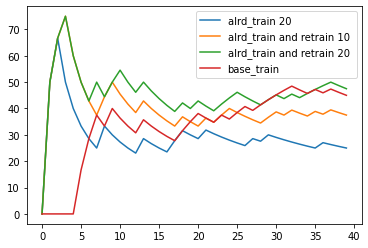

base_train accuracy  45.0000001
alrd_train accuracy  25.0000001
alrd_train and retrain accuracy 10  37.5000001
alrd_train and retrain accuracy 20 47.5000001
[[[0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1]]]
aa
(24, 5, 7)


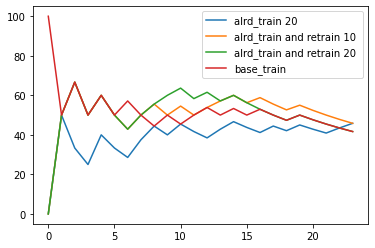

base_train accuracy  41.666666766666665
alrd_train accuracy  45.83333343333334
alrd_train and retrain accuracy 10  45.83333343333334
alrd_train and retrain accuracy 20 41.666666766666665
[[[0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -

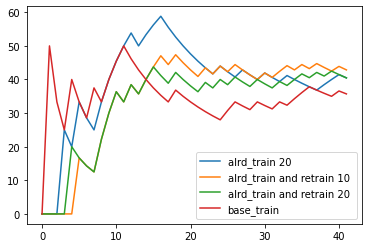

base_train accuracy  35.71428581428572
alrd_train accuracy  40.476190576190476
alrd_train and retrain accuracy 10  42.857142957142855
alrd_train and retrain accuracy 20 40.476190576190476
[[[0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0

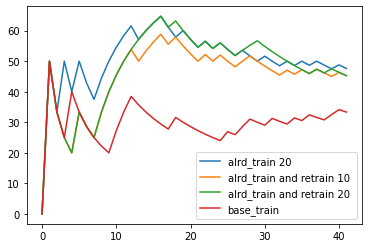

base_train accuracy  33.33333343333334
alrd_train accuracy  47.61904771904762
alrd_train and retrain accuracy 10  45.23809533809524
alrd_train and retrain accuracy 20 45.23809533809524
[[[0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1]

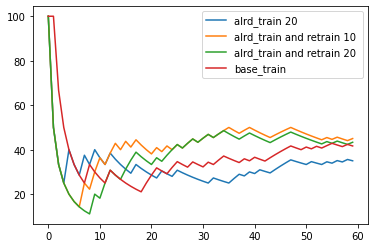

base_train accuracy  41.666666766666665
alrd_train accuracy  35.0000001
alrd_train and retrain accuracy 10  45.0000001
alrd_train and retrain accuracy 20 43.33333343333334
[[[0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1

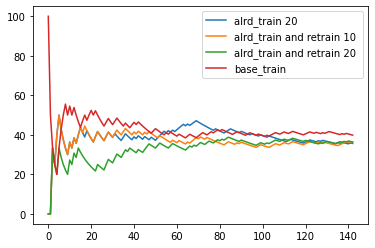

base_train accuracy  39.86013996013986
alrd_train accuracy  35.66433576433567
alrd_train and retrain accuracy 10  36.36363646363637
alrd_train and retrain accuracy 20 36.36363646363637
[[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 

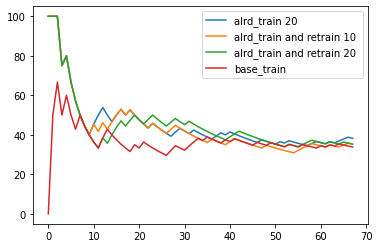

base_train accuracy  33.823529511764704
alrd_train accuracy  38.23529421764706
alrd_train and retrain accuracy 10  35.29411774705883
alrd_train and retrain accuracy 20 35.29411774705883
[[[1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1,

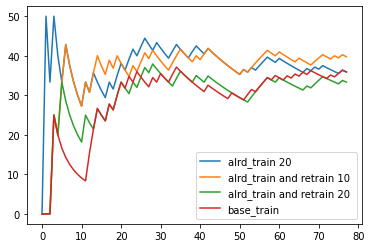

base_train accuracy  35.8974359974359
alrd_train accuracy  35.8974359974359
alrd_train and retrain accuracy 10  39.743589843589746
alrd_train and retrain accuracy 20 33.33333343333334
[[[0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1],

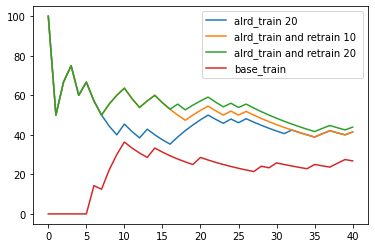

base_train accuracy  26.829268392682927
alrd_train accuracy  41.46341473414634
alrd_train and retrain accuracy 10  41.46341473414634
alrd_train and retrain accuracy 20 43.90243912439025
[[[1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 

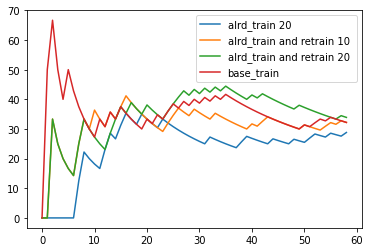

base_train accuracy  32.20338993050848
alrd_train accuracy  28.8135594220339
alrd_train and retrain accuracy 10  32.20338993050848
alrd_train and retrain accuracy 20 33.898305184745766
[[[1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 

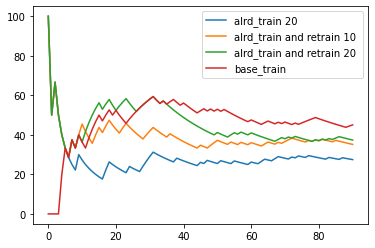

base_train accuracy  45.05494515494506
alrd_train accuracy  27.472527572527472
alrd_train and retrain accuracy 10  35.16483526483517
alrd_train and retrain accuracy 20 37.362637462637366
[[[0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 

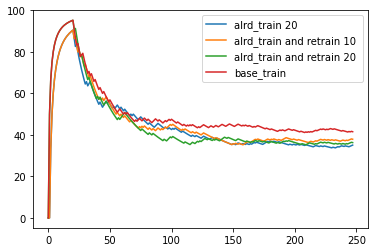

base_train accuracy  41.53225816451613
alrd_train accuracy  35.08064526129032
alrd_train and retrain accuracy 10  37.90322590645162
alrd_train and retrain accuracy 20 36.29032268064516
[[[1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1

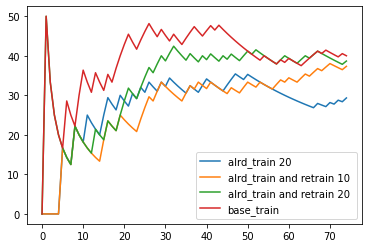

base_train accuracy  40.0000001
alrd_train accuracy  29.333333433333333
alrd_train and retrain accuracy 10  37.33333343333334
alrd_train and retrain accuracy 20 38.666666766666665
[[[1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, -1], 

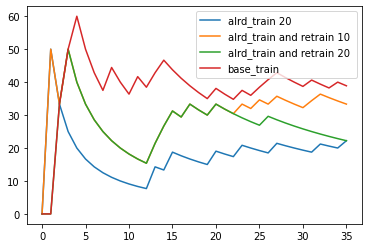

base_train accuracy  38.88888898888889
alrd_train accuracy  22.222222322222223
alrd_train and retrain accuracy 10  33.33333343333334
alrd_train and retrain accuracy 20 22.222222322222223
[[[1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1,

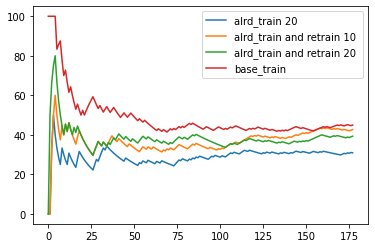

base_train accuracy  44.943820324719105
alrd_train accuracy  30.898876504494382
alrd_train and retrain accuracy 10  42.69662931348315
alrd_train and retrain accuracy 20 39.32584279662922
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0]

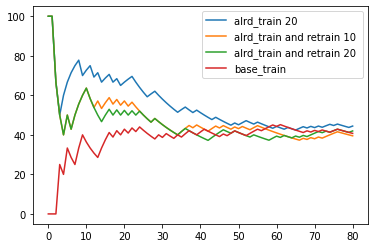

base_train accuracy  40.74074084074074
alrd_train accuracy  44.444444544444444
alrd_train and retrain accuracy 10  39.50617293950617
alrd_train and retrain accuracy 20 41.97530874197531
[[[0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0

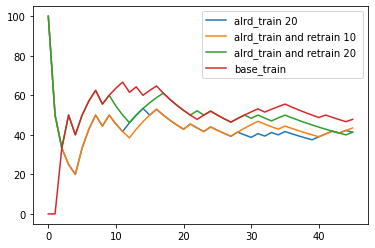

base_train accuracy  47.82608705652174
alrd_train accuracy  41.304347926086955
alrd_train and retrain accuracy 10  43.47826096956522
alrd_train and retrain accuracy 20 41.304347926086955
[[[0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], 

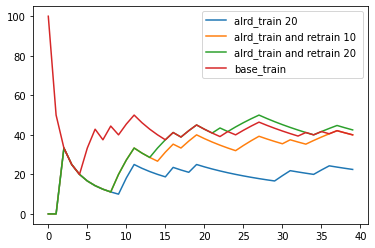

base_train accuracy  40.0000001
alrd_train accuracy  22.5000001
alrd_train and retrain accuracy 10  40.0000001
alrd_train and retrain accuracy 20 42.5000001
[[[0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 

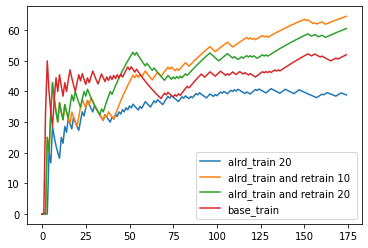

base_train accuracy  52.0000001
alrd_train accuracy  38.857142957142855
alrd_train and retrain accuracy 10  64.57142867142856
alrd_train and retrain accuracy 20 60.57142867142857
[[[0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1,

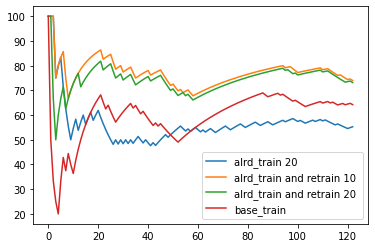

base_train accuracy  64.22764237642276
alrd_train accuracy  55.28455294552845
alrd_train and retrain accuracy 10  73.98373993739837
alrd_train and retrain accuracy 20 73.17073180731707
[[[0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 

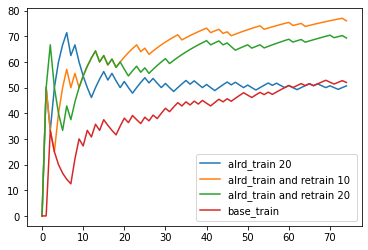

base_train accuracy  52.0000001
alrd_train accuracy  50.666666766666665
alrd_train and retrain accuracy 10  76.0000001
alrd_train and retrain accuracy 20 69.33333343333332
[[[1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1]]]
aa
(0, 5, 7)


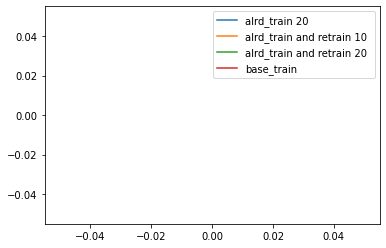

[[[1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [

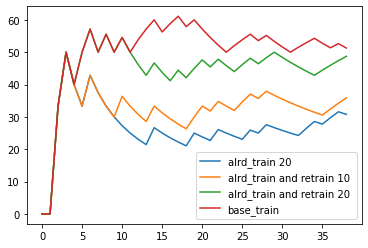

base_train accuracy  51.282051382051286
alrd_train accuracy  30.76923086923077
alrd_train and retrain accuracy 10  35.8974359974359
alrd_train and retrain accuracy 20 48.71794881794872
[[[1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 

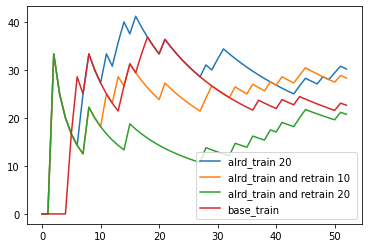

base_train accuracy  22.641509533962264
alrd_train accuracy  30.18867934528302
alrd_train and retrain accuracy 10  28.30188689245283
alrd_train and retrain accuracy 20 20.75471708113208
[[[0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0,

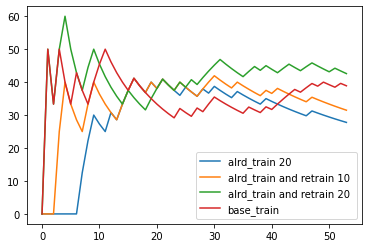

base_train accuracy  38.88888898888889
alrd_train accuracy  27.77777787777778
alrd_train and retrain accuracy 10  31.481481581481482
alrd_train and retrain accuracy 20 42.592592692592596
[[[1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 

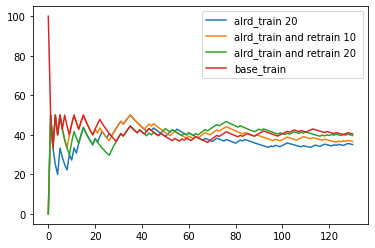

base_train accuracy  40.45801536717558
alrd_train accuracy  35.11450391679389
alrd_train and retrain accuracy 10  36.6412214740458
alrd_train and retrain accuracy 20 39.69465658854962
[[[0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1],

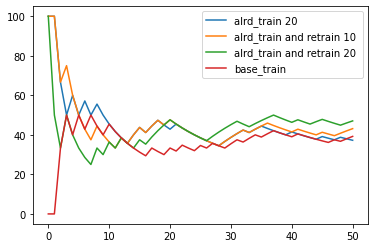

base_train accuracy  39.21568637450981
alrd_train accuracy  37.25490206078432
alrd_train and retrain accuracy 10  43.13725500196079
alrd_train and retrain accuracy 20 47.05882362941177


<Figure size 432x288 with 0 Axes>

In [0]:

import tensorflow as tf

for l in range(len(data)):
  X=[]
  Y=[]
  print(data[l:l+1])
  for x,y in dataGen1(data[l:l+1]):
    X.append(x)
    Y.append(y)
  X=np.array(X,dtype=np.float32)
  X=X.reshape((X.shape[0],5,7))
  Y=np.array(Y,dtype=np.float32)
  Y=Y.reshape((Y.shape[0],3))
  pred=0
  total=0
  pred_1=pred_2=pred_3=0
  total_1=0
  toplot=[]
  toplot_1=[]
  toplot_2=[]
  toplot_3=[]
  print("aa")
  model6=myModel6() # medele vierge 
  model6_1=tf.keras.models.load_model('rps.h5') 
  model6_2=tf.keras.models.load_model('rps.h5')
  model6_3=tf.keras.models.load_model('rps.h5')

  print(X.shape)
  for i in range(X.shape[0]):
    if X.shape[0]==0:
      print("continue")
      continue
    y_pred=np.argmax(model6.predict(X[i].reshape(1,5,7)))
    y_pred_1=np.argmax(model6_1.predict(X[i].reshape(1,5,7)))
    y_pred_2=np.argmax(model6_2.predict(X[i].reshape(1,5,7)))
    y_pred_3=np.argmax(model6_3.predict(X[i].reshape(1,5,7)))
  
    y=np.array([0,0,0])
    y[y_pred]=1

    y_1=np.array([0,0,0])
    y_1[y_pred_1]=1

    y_2=np.array([0,0,0])
    y_2[y_pred_2]=1

    y_3=np.array([0,0,0])
    y_3[y_pred_3]=1
    
    total+=1

    if np.array_equal(y,Y[i]):
      pred+=1

    if np.array_equal(y_1,Y[i]):
      pred_1+=1

    if np.array_equal(y_2,Y[i]):
      pred_2+=1

    if np.array_equal(y_3,Y[i]):
      pred_3+=1

    model6.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=20,verbose=0)
    model6_2.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=10,verbose=0)
    model6_3.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=20,verbose=0)
    if i%1==0: # ici on voulait au début traker le taux chaque 5, 3 ou plus coups mais comme vous pouvez le voir on la mit pour un coup 
      #print("accuracy=",100*pred/total,"%")
      toplot.append(100*pred/total)
      toplot_1.append(100*pred_1/total)
      toplot_2.append(100*pred_2/total)
      toplot_3.append(100*pred_3/total)
      #pred=0
      #total=0
    
  

  plt.plot(toplot_1, label="alrd_train 20")
  plt.plot(toplot_2, label="alrd_train and retrain 10 ")
  plt.plot(toplot_3, label="alrd_train and retrain 20 ")
  plt.plot(toplot, label="base_train")
  plt.legend()
  plt.savefig('game'+str(l)+'.png')
  plt.show()
  
  if total==0:
    continue
  print("base_train accuracy ",100*pred/total+0.0000001)
  print("alrd_train accuracy ",100*pred_1/total+0.0000001)
  print("alrd_train and retrain accuracy 10 ",100*pred_2/total+0.0000001)
  print("alrd_train and retrain accuracy 20",100*pred_3/total+0.0000001)

[[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0,

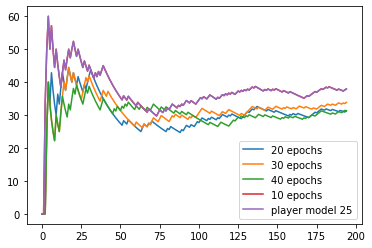

10 epochs accuracy  37.94871804871795
20 epochs accuracy  31.282051382051282
30 epochs accuracy  33.84615394615385
40 epochs accuracy  31.282051382051282
pmodel    accuracy  37.94871804871795
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1]

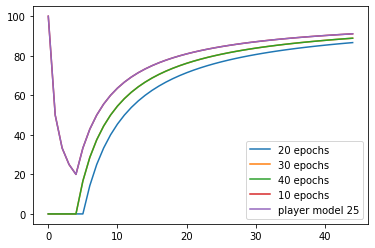

10 epochs accuracy  91.11111121111111
20 epochs accuracy  86.66666676666667
30 epochs accuracy  88.88888898888888
40 epochs accuracy  88.88888898888888
pmodel    accuracy  91.11111121111111
[[[0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1],

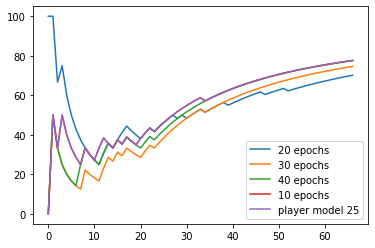

10 epochs accuracy  77.61194039850746
20 epochs accuracy  70.14925383134327
30 epochs accuracy  74.62686577164179
40 epochs accuracy  77.61194039850746
pmodel    accuracy  77.61194039850746
[[[0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0

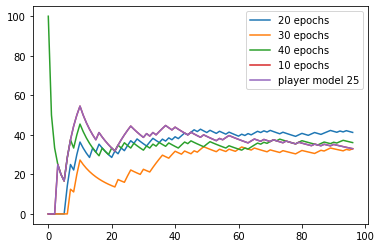

10 epochs accuracy  32.98969082164948
20 epochs accuracy  41.23711350206186
30 epochs accuracy  32.98969082164948
40 epochs accuracy  36.082474326804125
pmodel    accuracy  32.98969082164948
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1]]]
aa
(1, 5, 7)


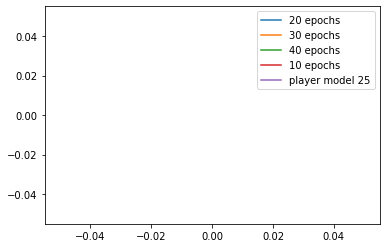

10 epochs accuracy  1e-07
20 epochs accuracy  1e-07
30 epochs accuracy  1e-07
40 epochs accuracy  1e-07
pmodel    accuracy  1e-07
[[[0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 

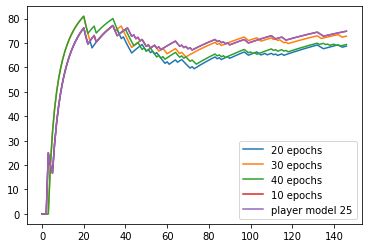

10 epochs accuracy  74.8299320727891
20 epochs accuracy  68.70748309319727
30 epochs accuracy  72.7891157462585
40 epochs accuracy  69.38775520204081
pmodel    accuracy  74.8299320727891
[[[0, 0, 1, 1, 0, 0, -1], [1, 0, 0, 0, 1, 0, -1]]]
aa
(0, 5, 7)


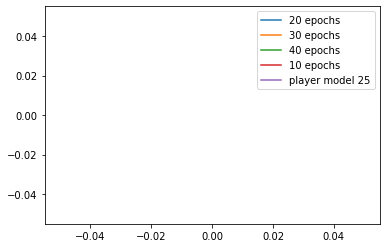

[[[0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [

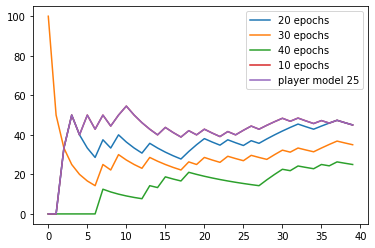

10 epochs accuracy  45.0000001
20 epochs accuracy  45.0000001
30 epochs accuracy  35.0000001
40 epochs accuracy  25.0000001
pmodel    accuracy  45.0000001
[[[0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1]]]
aa
(24, 5, 7)


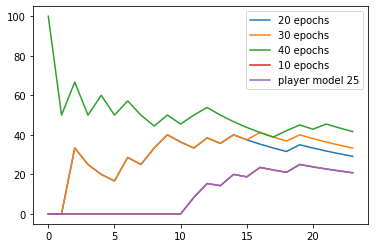

10 epochs accuracy  20.833333433333333
20 epochs accuracy  29.16666676666667
30 epochs accuracy  33.33333343333334
40 epochs accuracy  41.666666766666665
pmodel    accuracy  20.833333433333333
[[[0, 0, 1, 1, 0, 0, -1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 1, 0, -1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, -1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, -1], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, -1], [0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0

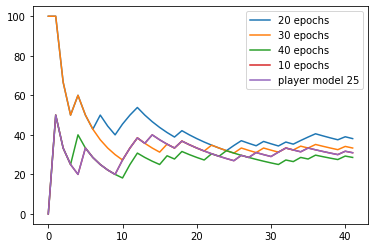

10 epochs accuracy  30.952381052380954
20 epochs accuracy  38.095238195238096
30 epochs accuracy  33.33333343333334
40 epochs accuracy  28.571428671428574
pmodel    accuracy  30.952381052380954


<Figure size 432x288 with 0 Axes>

In [0]:
#ici on a tester de différente nombre d'epochs sur chaque entrainement pour voir l'impact sur le taux de prédiction
#on aussi tester le fait de garder un modele s'entrainer sur le meme joueur (notre camarade) sans le rénitialiser à chaque partie
import tensorflow as tf
model=myModel6() # le modele qui va pas se rénitialiser à chaque partie mais essaye de s'adapter au joueur 
for l in range(10):
  X=[]
  Y=[]
  print(data[l:l+1])
  for x,y in dataGen1(data[l:l+1]):
    X.append(x)
    Y.append(y)
  X=np.array(X,dtype=np.float32)
  X=X.reshape((X.shape[0],5,7))
  Y=np.array(Y,dtype=np.float32)
  Y=Y.reshape((Y.shape[0],3))
  pred=0
  total=0
  pred_1=pred_2=pred_3=pred_4=0
  total_1=0
  toplot=[]
  toplot_1=[]
  toplot_2=[]
  toplot_3=[]
  toplot_4=[]
  print("aa")
  model6=myModel6()
  model6_1=myModel6()
  model6_2=myModel6()
  model6_3=myModel6()

  print(X.shape)
  for i in range(X.shape[0]):
    if X.shape[0]==0:
      print("continue")
      continue
    y_pred_4=np.argmax(model6.predict(X[i].reshape(1,5,7)))
    y_pred=np.argmax(model6.predict(X[i].reshape(1,5,7)))
    y_pred_1=np.argmax(model6_1.predict(X[i].reshape(1,5,7)))
    y_pred_2=np.argmax(model6_2.predict(X[i].reshape(1,5,7)))
    y_pred_3=np.argmax(model6_3.predict(X[i].reshape(1,5,7)))
  
    y=np.array([0,0,0])
    y[y_pred]=1

    y_1=np.array([0,0,0])
    y_1[y_pred_1]=1

    y_2=np.array([0,0,0])
    y_2[y_pred_2]=1

    y_3=np.array([0,0,0])
    y_3[y_pred_3]=1

    y_4=np.array([0,0,0])
    y_4[y_pred_4]=1
    
    total+=1

    if np.array_equal(y,Y[i]):
      pred+=1

    if np.array_equal(y_1,Y[i]):
      pred_1+=1

    if np.array_equal(y_2,Y[i]):
      pred_2+=1

    if np.array_equal(y_3,Y[i]):
      pred_3+=1

    if np.array_equal(y_4,Y[i]):
      pred_4+=1

    model.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=25,verbose=0)
    model6.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=10,verbose=0)
    model6_1.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=20,verbose=0)
    model6_2.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=30,verbose=0)
    model6_3.fit(X[i].reshape(1,5,7),Y[i].reshape(1,3),epochs=40,verbose=0)
    if i%1==0:
      toplot.append(100*pred/total)
      toplot_1.append(100*pred_1/total)
      toplot_2.append(100*pred_2/total)
      toplot_3.append(100*pred_3/total)
      toplot_4.append(100*pred_4/total)

    
  

  plt.plot(toplot_1, label="20 epochs ")
  plt.plot(toplot_2, label="30 epochs ")
  plt.plot(toplot_3, label="40 epochs ")
  plt.plot(toplot, label="10 epochs") # ici une erreur au lieu de mettre toplot_4 on a mit toplot
  plt.plot(toplot, label="player model 25")
  plt.legend()
  plt.show()
  plt.savefig('game'+str(l)+'.png')
  if total==0:
    continue
  print("10 epochs accuracy ",100*pred/total+0.0000001)
  print("20 epochs accuracy ",100*pred_1/total+0.0000001)
  print("30 epochs accuracy ",100*pred_2/total+0.0000001)
  print("40 epochs accuracy ",100*pred_3/total+0.0000001)
  print("pmodel    accuracy ",100*pred_4/total+0.0000001)